In [125]:
import sys
import seaborn as sns

sys.path.append('../')

from scripts import project_functions # This is called a relative import
df = project_functions.load_and_process("../../data/raw/Vancouver.csv")
df
df.Host_ResponseTime.unique()

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

<AxesSubplot:>

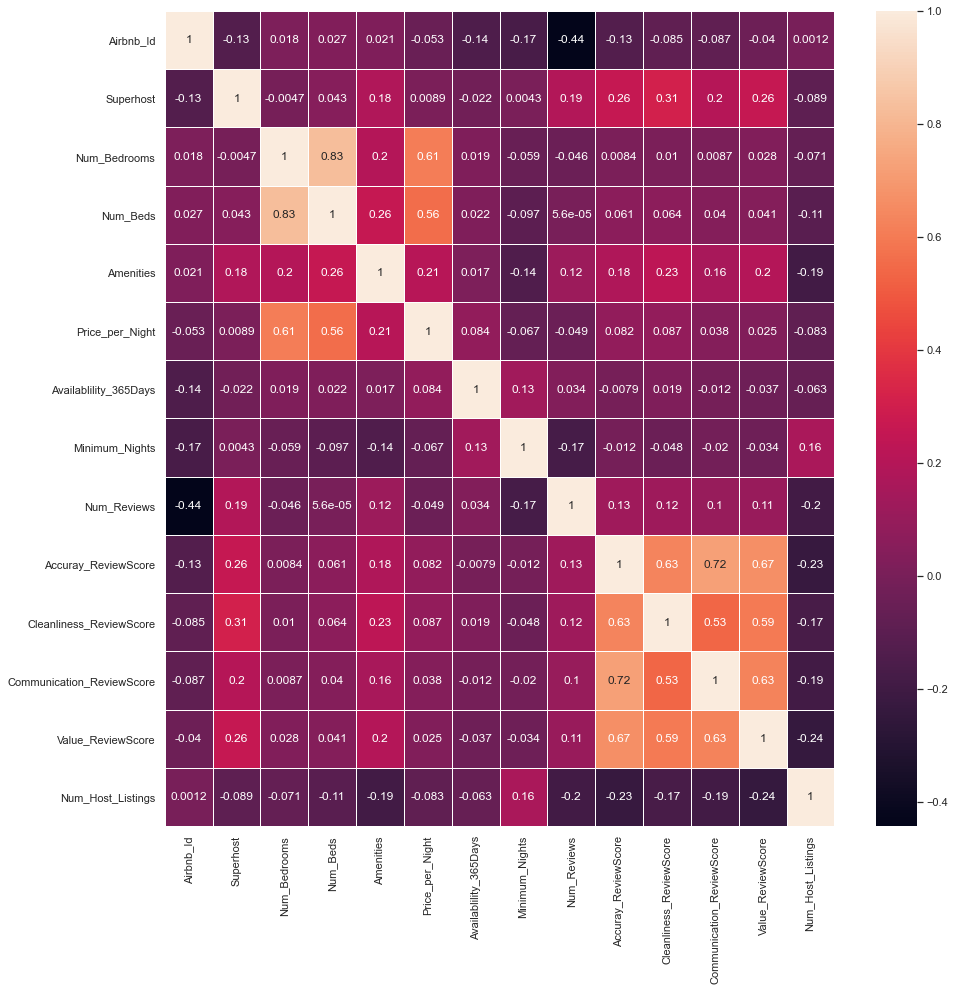

In [126]:
# EDA

# Trying to understand meta-information about my data

df.shape

df.head()

# I checked the statistical data for all the columns and nothing stands out as mistyping or an error, data seems clean
df.describe()

# Just trying to understand how many different unique neighbourhoods and response times can be for further analyisis later
len(df.Neighbourhood.unique())

len(df.Amenities.unique())

df.Host_ResponseTime.unique()

df.columns

# Plotting a correlation plot to see relation between all the different variables

sns.set_style("white")
sns.despine()
sns.set_theme(font_scale=1)

sns.set(rc={'figure.figsize':(30,20)})
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5)

# So interestingly num of beds, bedrooms and amenities have a high correlation with the price of Airbnb, which seems obvious since more rooms 
# usually that means it might be the whole apt or a house and they are usually more expensive to book

<AxesSubplot:xlabel='Superhost', ylabel='Price_per_Night'>

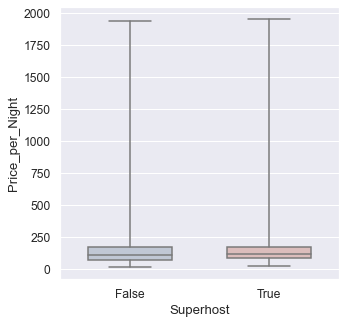

In [127]:
# There are more factors that could lead to a fluctuation in price, these might include superhost, location
# minimum nights, and property type, that might need more digging using other plots

sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")
sns.despine()
sns.set_theme(font_scale=1.1)

sns.boxplot(x="Superhost", y="Price_per_Night", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# Hmmm weirdly enough after counting the values of superhost vs the normal host and checking stats it seems
# they have almsot similar values so I guess that gets crossed out of set of factors to affect prices of Airbnb's

<AxesSubplot:xlabel='Price_per_Night', ylabel='Neighbourhood'>

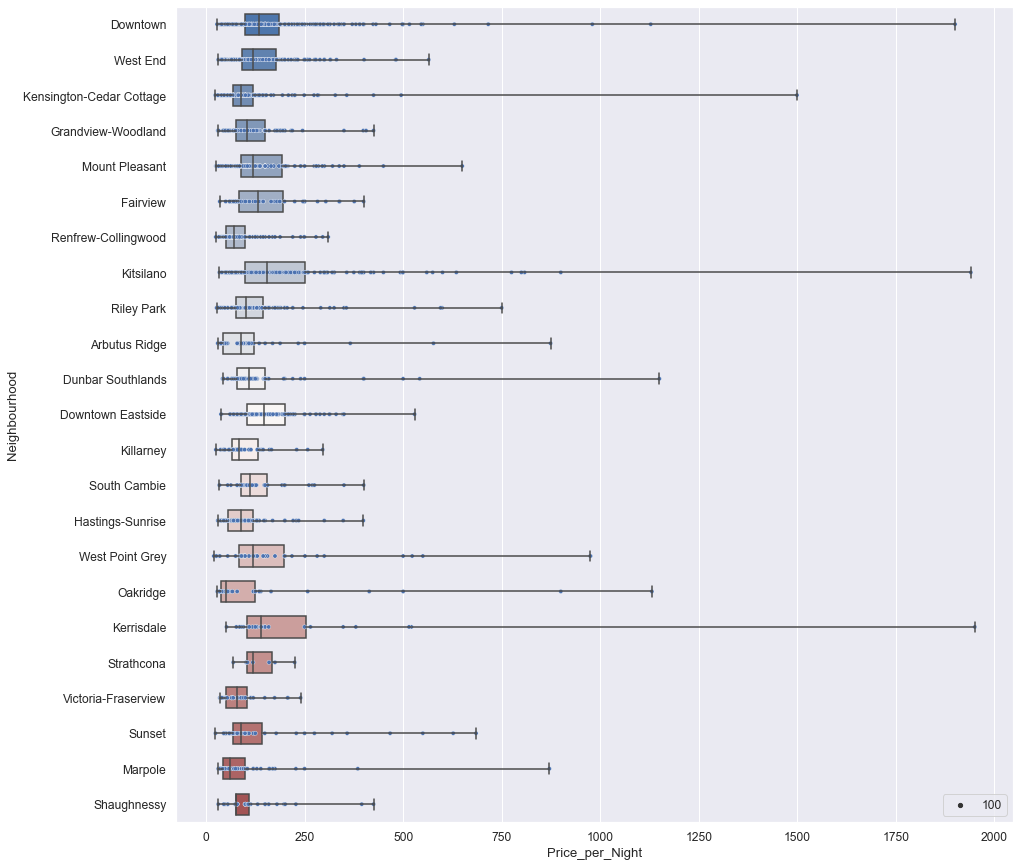

In [155]:
# Checking for different locations in Vancouver reveals there might be a slight relation between prices and locations
# All of them have their medians and IQR fall close to the same price range besides certain ones like Kitsilano, Kerrisdale
# and downtown which seem further up in price and their max is heigher too
# 

import pandas as pd

sns.set(rc={'figure.figsize':(15,15)})
sns.set_style("white")
sns.despine()
sns.set_theme(font_scale=1.1)

sns.boxplot(y="Neighbourhood", x="Price_per_Night", data=df,
            whis=[0, 100], width=.6, palette="vlag")
sns.scatterplot(y="Neighbourhood", x="Price_per_Night", data=df, palette="dark:#fff", size=(100))

# The range of values for boxplots might need to decreased like prices between 0 and 500, to reveal a better correlation visual 
# Since right now the outliers give effect of no correlation as they stretch the box plots

<AxesSubplot:xlabel='Price_per_Night', ylabel='Neighbourhood'>

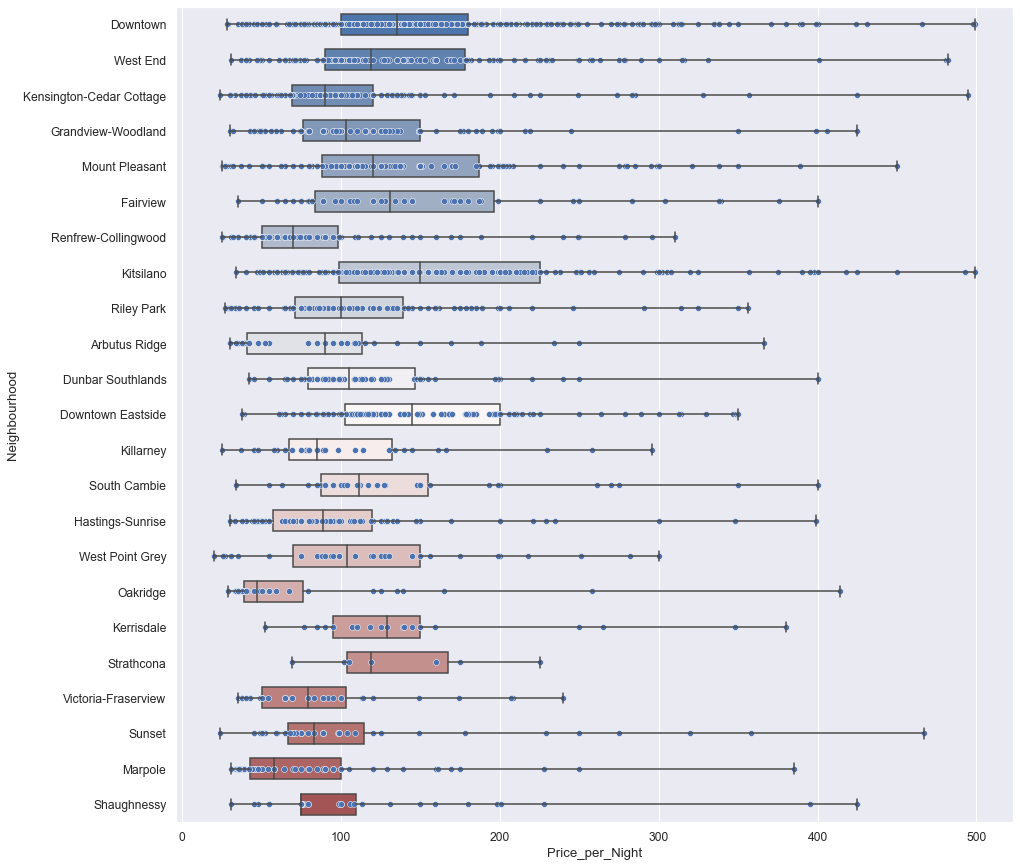

In [156]:
df2 = df.loc[lambda row: row["Price_per_Night"] < 500]
pd.DataFrame(df2).reset_index()
sns.boxplot(y="Neighbourhood", x="Price_per_Night", data=df2,
             whis=[0, 100], width=.6, palette="vlag")
sns.scatterplot(y="Neighbourhood", x="Price_per_Night", data=df2, palette="dark:#fff")

# This is much better now, I can see the boxplots much more clearly with grater distinction between prices based on location
# But still the same relation holds true, where places closer to downtown are much pricier and also have more bookings

<AxesSubplot:xlabel='Neighbourhood'>

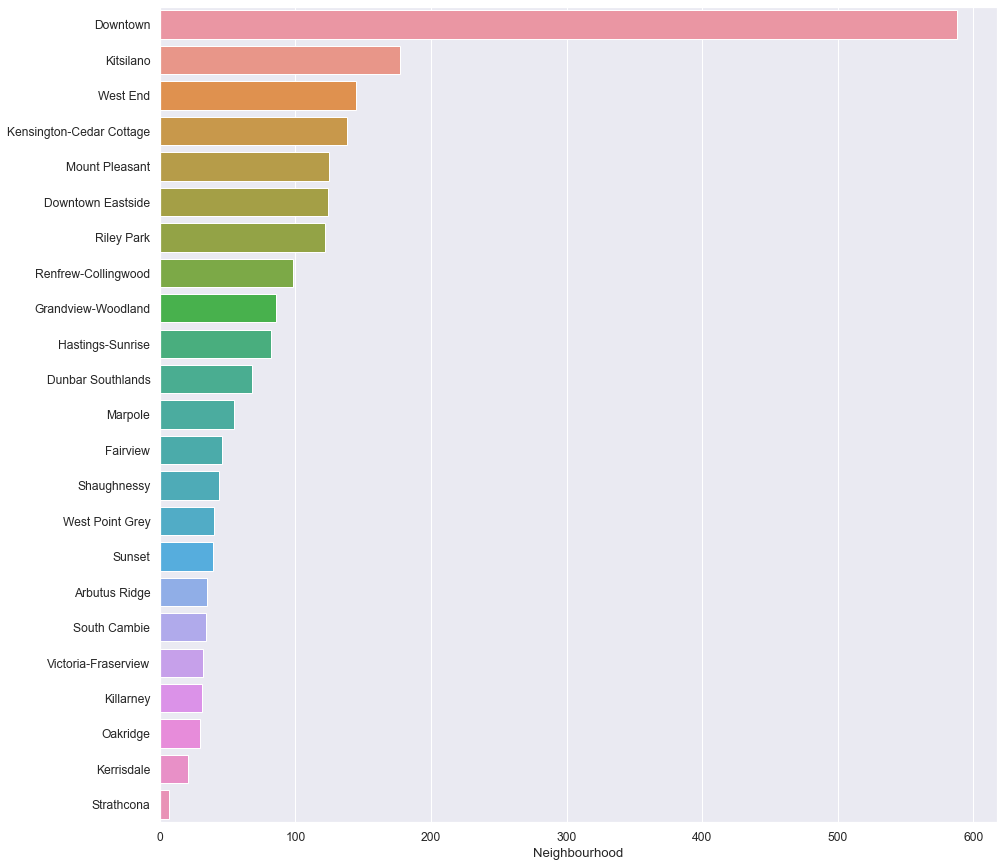

In [162]:
# While fidling with graphs above, I uncovered another important relation from my data about the popularity of Airbnb with
# location

sns.barplot(y=df2["Neighbourhood"].value_counts().index, x=df2["Neighbourhood"].value_counts(), data=df)

# This means that Airbnbs closer to Downtown is booked way more than  other Airbnb's further away from DT. This can also 
# imply there might be more Airbnb's near downtown than the rest of Vancouver where there might be less short term rentals